In [2]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import datetime
from statsmodels.stats.power import zt_ind_solve_power

In [3]:
alpha_key = 'Y8YQFOIVHPA381U4'
function = 'TIME_SERIES_DAILY'
symbol = 'XLV'


## Load XLV API 
#### Create percent change column

In [4]:
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [5]:
response = requests.get(url)
xlv_file = response.json()

In [6]:
xlv_values = xlv_file['Time Series (Daily)']

In [7]:
for value in xlv_values:
    open_prices = []

In [8]:
df = pd.DataFrame(xlv_values)
xlv_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
xlv_df.columns = column_head
xlv_df.reset_index(inplace = True)

In [9]:
xlv_df['open'] = xlv_df.open.astype(float)
xlv_df['high'] = xlv_df.high.astype(float)
xlv_df['low'] = xlv_df.low.astype(float)
xlv_df['close'] = xlv_df.close.astype(float)
xlv_df['volume'] = xlv_df.volume.astype(float)

In [10]:
xlv_df['day_pct_change'] = (xlv_df['close']-xlv_df['open'])/xlv_df['open']*100

In [11]:
for entry in xlv_df:
    pct_change = (xlv_df['close'] - xlv_df['open'].iloc[-1])/xlv_df['open'].iloc[-1]
    xlv_df['overall_pct_change'] = pct_change * 100

In [12]:
column_heads = ['date','open','close', 'high','low','volume', 'day_pct_change', 'overall_pct_change']
xlv_df.columns = column_heads

In [13]:
xlv_df.head()


,date,open,close,high,low,volume,day_pct_change,overall_pct_change
0,2019-12-11,100.01,100.27,99.880,99.98,2576118.0,-0.029997,235.165940
1,2019-12-10,99.69,100.02,99.295,99.93,6024565.0,0.240746,234.998324
2,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,234.260811
3,2019-12-06,100.27,100.75,100.200,100.41,5658514.0,0.139623,236.607442
4,2019-12-05,99.81,99.90,98.910,99.75,7390352.0,-0.060114,234.394904


## XLV - 1 Year 

In [14]:
xlv_1_year_changes = []
for i in xlv_df['date'][0:365]:
    xlv_1_year_changes.append(xlv_df['day_pct_change'])

## Load S&P API


In [15]:
sp_symbol = '.INX'
url_sp = f"https://www.alphavantage.co/query?function={function}&symbol={sp_symbol}&outputsize=full&apikey={alpha_key}"

In [16]:
response2 = requests.get(url_sp)
sp_file = response2.json()

In [17]:
sp_values = sp_file['Time Series (Daily)']
sp_df = pd.DataFrame(sp_values)
sp_df = sp_df.T
sp_df.columns = column_head
sp_df['open'] = sp_df.open.astype(float)
sp_df['high'] = sp_df.high.astype(float)
sp_df['low'] = sp_df.low.astype(float)
sp_df['close'] = sp_df.close.astype(float)
sp_df['volume'] = sp_df.volume.astype(float)

In [18]:
sp_df['day_pct_change'] = (sp_df['close']-sp_df['open'])/sp_df['open']*100

In [19]:
for entry in sp_df:
    pct_change = (sp_df['close'] - sp_df['open'].iloc[-1])/sp_df['open'].iloc[-1]
    sp_df['overall_pct_change'] = pct_change * 100

In [20]:
xlv_df.describe()

,open,close,high,low,volume,day_pct_change,overall_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000,5034.000000
mean,45.306005,45.571740,45.007637,45.305044,5.178555e+06,-0.002985,51.877451
std,21.750188,21.847649,21.644113,21.755617,5.490113e+06,0.997414,72.932004
min,21.750000,22.100000,21.000000,21.880000,9.000000e+02,-8.646889,-26.651022
25%,29.550000,29.730000,29.350000,29.550000,4.510750e+05,-0.484426,-0.938652
50%,32.905000,33.080000,32.680550,32.915000,4.409894e+06,0.021669,10.341938
75%,66.825000,67.357500,65.975000,66.855000,7.780256e+06,0.506674,124.120013
max,100.450000,100.750000,100.200000,100.410000,6.647018e+07,8.372274,236.607442


In [21]:
sp_df.describe()

,open,high,low,close,volume,day_pct_change,overall_pct_change
count,5018.000000,5018.000000,5018.000000,5018.000000,5.018000e+03,5018.000000,5018.000000
mean,1570.597865,1579.478507,1560.967862,1570.774593,3.090290e+09,0.016923,6.909960
std,580.669073,581.404970,579.761205,580.750525,1.474858e+09,1.138757,39.527005
min,679.280000,695.270000,666.790000,676.530000,3.560700e+08,-8.723105,-53.954058
25%,1151.155050,1159.525000,1141.940000,1151.037525,1.667910e+09,-0.447677,-21.658157
50%,1360.020000,1368.275000,1348.660000,1360.150000,3.218100e+09,0.051683,-7.425557
75%,1979.960000,1988.222450,1971.715000,1981.592475,3.917825e+09,0.520102,34.871021
max,3147.179900,3154.260000,3143.409900,3153.629900,1.145623e+10,10.789002,114.642158


### S&P 1 - year

In [22]:
xlv_1_year_changes = []
for i in xlv_df['date'][0:365]:
    xlv_1_year_changes.append(xlv_df['day_pct_change'])

In [23]:
xlv_avg_percent_moves = sum(xlv_1_year_changes)/len(xlv_1_year_changes)
xlv_1_year_samples = []
for i in range(100):
    xlv_1_year_sample = np.random.choice(xlv_avg_percent_moves, size = 50)
    xlv_1_year_samples.append(xlv_1_year_sample)



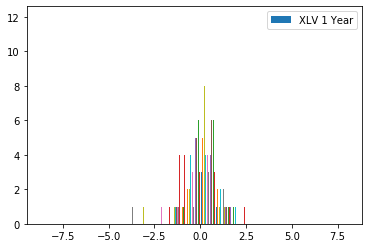

In [24]:
plt.hist(xlv_1_year_samples, bins = 100, label = 'XLV 1 Year');
plt.legend();

In [48]:
x_hat = sum(xlv_1_year_samples)/len(xlv_1_year_samples)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 365

z_stat_xlv_1_yr = (x_hat - mu)/sigma/math.sqrt(n)
z_stat_xlv_1_yr.mean()

-0.005165456617198258

## Hypothesis 1 Testing: Average Returns

#### H0: The daily avg percent change in the XLV index fund is <= to that of the overall S&P 500 
#### HA: The daily avg percent change in the XLV index fund is greater than the S&P 500 

In [27]:
xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())


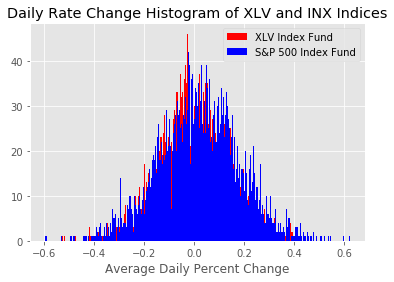

In [81]:
plt.style.use('ggplot')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Index Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index Fund');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change Histogram of XLV and INX Indices')
plt.legend();

In [29]:
#Z-test stat for S&P benchmark group
import statistics
x_hat = sum(xlv_avg_percent_moves)/len(xlv_avg_percent_moves)
mu = sum(sp_avg_percent_moves)/len(xlv_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5017

In [30]:
z_stat = (x_hat - mu)/sigma/math.sqrt(n)
p_val = stats.norm.cdf(z_stat)

In [31]:
#take a t test to see if there is a statistical significance in difference of means
S = statistics.stdev(xlv_avg_percent_moves)
t_stat = (x_hat - mu)/S/math.sqrt(n)

*Due to the Z-stat and T-stat we fail to reject H0*

In [32]:
#Calculating Cohen's D (d = u1 - u2/std_pooled)
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

xlv_sp_cohen_d = cohen_d(xlv_df['day_pct_change'], sp_df['day_pct_change'])
print(f"XLV-S&P Cohen's D: {xlv_sp_cohen_d}")

XLV-S&P Cohen's D: -0.018601045543556925


In [33]:
n_xlv = len(xlv_df['day_pct_change'])
n_sp = len(sp_df['day_pct_change'])
ration = n_xlv/n_sp
xlv_sp_power = zt_ind_solve_power(effect_size = xlv_sp_cohen_d, nobs1=n_xlv, power = None, alpha = .05)
print(f"XLV-SP Power: {xlv_sp_power}")
alpha = 1 - xlv_sp_power
alpha

XLV-SP Power: 0.15417480382834856


0.8458251961716514

In [34]:
#z_score * SE = real difference in sample and population means
std_error = sigma/math.sqrt(n)
real_diff_xlv = std_error * z_stat
print(f"XLV P-Value: {p_val}")
print(f"XLV Z-Stat: {z_stat}")
print(f"XLV T-stat: {t_stat}")
print(f"XLV Standard_error: {std_error}")
print(f"XLV Real Difference: {real_diff_xlv}")

XLV P-Value: 0.4992784938601761
XLV Z-Stat: -0.0018085486763166829
XLV T-stat: -0.002116857764594145
XLV Standard_error: 0.0022775803959920976
XLV Real Difference: -4.119115010376334e-06


## Johnson & Johnson Performance

In [35]:
symbol = 'JNJ'
function = 'TIME_SERIES_DAILY'
alpha_key = 'Y8YQFOIVHPA381U4'
jj_url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [36]:
response3 = requests.get(jj_url)
jj_file = response3.json()

In [53]:
jj_values = jj_file['Time Series (Daily)']
df = pd.DataFrame(jj_values)
jj_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
jj_df.columns = column_head
jj_df.reset_index(inplace = True)
jj_df['open'] = jj_df.open.astype(float)
jj_df['high'] = jj_df.high.astype(float)
jj_df['low'] = jj_df.low.astype(float)
jj_df['close'] = jj_df.close.astype(float)
jj_df['volume'] = jj_df.volume.astype(float)
jj_df['day_pct_change'] = (jj_df['close']-jj_df['open'])/jj_df['open']*100
for entry in jj_df:
    pct_change = (jj_df['close'] - jj_df['open'].iloc[-1])/jj_df['open'].iloc[-1]
    sp_df['overall_pct_change'] = pct_change * 100
    


In [54]:
jj_df.describe()

,open,high,low,close,volume,day_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000
mean,81.494031,82.081075,80.888453,81.505991,8.913282e+06,0.021215
std,27.516420,27.664672,27.353799,27.515241,4.899386e+06,1.021323
min,41.500000,43.600000,41.020000,41.850000,1.348570e+05,-8.077905
25%,60.625000,61.000000,60.202500,60.590000,5.883127e+06,-0.466679
50%,66.500000,66.940000,66.150000,66.515000,7.926250e+06,0.016789
75%,100.555000,101.057500,99.960000,100.520000,1.066302e+07,0.531029
max,147.840000,148.990000,147.000000,148.140000,9.844020e+07,8.016304


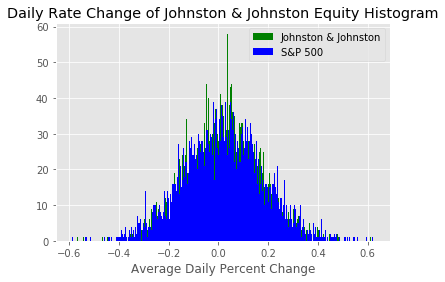

In [80]:
jj_avg_pct_moves = []

for i in range(5000):
    sample_jj = jj_df.sample(n=50, random_state = i)
    jj_avg_pct_moves.append(sample_jj.day_pct_change.mean())
    
plt.style.use('ggplot')
plt.hist(jj_avg_pct_moves, bins = 500, color = 'green', label = 'Johnston & Johnston');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change of Johnston & Johnston Equity Histogram')
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

In [56]:
x_hat = sum(jj_avg_pct_moves)/len(sp_avg_percent_moves)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5034

z_stat_jj = (x_hat - mu)/sigma/math.sqrt(n)
p_val_jj = stats.norm.cdf(z_stat_jj)
S_jj = statistics.stdev(jj_avg_pct_moves)
t_stat_jj = (x_hat - mu)/S/math.sqrt(n)
std_error_jj = sigma/math.sqrt(n)
real_difference_jj = std_error_jj * z_stat_jj
print(f"JNJ Z-Stat: {z_stat_jj}")
print(f"JNJ P-Value: {p_val_jj}")
print(f"JNJ T-Stat: {t_stat_jj}")
print(f"JNJ Standard Error: {std_error_jj}")
print(f"JNJ Real Difference: {real_difference_jj}")

JNJ Z-Stat: 0.00033734165824424536
JNJ P-Value: 0.5001345798478618
JNJ T-Stat: 0.00039484937172371324
JNJ Standard Error: 0.002273731408030497
JNJ Real Difference: 7.670243235870307e-07


## DVA 


In [50]:
symbol = 'DVA'
function = 'TIME_SERIES_DAILY'
alpha_key = 'Y8YQFOIVHPA381U4'
dva_url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [51]:
response3 = requests.get(dva_url)
dva_file = response3.json()

In [52]:
dva_values = dva_file['Time Series (Daily)']
df = pd.DataFrame(dva_values)
dva_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
dva_df.columns = column_head
dva_df.reset_index(inplace = True)
dva_df['open'] = dva_df.open.astype(float)
dva_df['high'] = dva_df.high.astype(float)
dva_df['low'] = dva_df.low.astype(float)
dva_df['close'] = dva_df.close.astype(float)
dva_df['volume'] = dva_df.volume.astype(float)
dva_df['day_pct_change'] = (dva_df['close']-dva_df['open'])/dva_df['open']*100
for entry in dva_df:
    pct_change = (dva_df['close'] - dva_df['open'].iloc[-1])/dva_df['open'].iloc[-1]
    dva_df['overall_pct_change'] = pct_change * 100
    

In [58]:
dva_df.describe()

,open,high,low,close,volume,day_pct_change,overall_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000,5034.000000
mean,55.786538,56.343505,55.228336,55.804725,9.948897e+05,0.073067,726.736668
std,25.133181,25.291248,24.974287,25.129737,8.702565e+05,1.989863,372.292396
min,2.500000,2.620000,2.060000,2.560000,2.726700e+04,-26.283988,-62.074074
25%,42.250000,42.675000,41.817500,42.255000,4.844000e+05,-0.715849,526.000000
50%,57.035000,57.704500,56.510000,57.020000,7.768490e+05,0.021406,744.740741
75%,71.147500,71.850000,70.497500,71.260000,1.217925e+06,0.801809,955.703704
max,130.690000,131.330000,129.950000,131.190000,1.739930e+07,26.857143,1843.555556


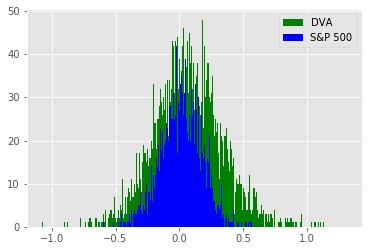

In [82]:
dva_avg_pct_moves = []

for i in range(5000):
    sample_dva = dva_df.sample(n=50, random_state = i)
    dva_avg_pct_moves.append(sample_dva.day_pct_change.mean())

plt.style.use('ggplot')    
plt.hist(dva_avg_pct_moves, bins = 500, color = 'green', label = 'DVA');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

In [68]:
x_hat = sum(dva_avg_pct_moves)/len(dva_avg_pct_moves)
mu = sum(sp_avg_percent_moves)/len(sp_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5034

z_stat_dva = (x_hat - mu)/sigma/math.sqrt(n)
p_val_dva = stats.norm.cdf(z_stat_dva)
S_dva = statistics.stdev(dva_avg_pct_moves)
t_stat_dva = (x_hat - mu)/S/math.sqrt(n)
std_error_dva = sigma/math.sqrt(n)
real_difference_dva = std_error_dva * z_stat_dva
print(f"DVA Z-Stat: {z_stat_dva}")
print(f"DVA P-Value: {p_val_dva}")
print(f"DVA T-Stat: {t_stat_dva}")
print(f"DVA Standard Error: {std_error_dva}")
print(f"DVA Real Difference: {real_difference_dva}")

DVA Z-Stat: 0.0045293649162431015
DVA P-Value: 0.5018069489901502
DVA T-Stat: 0.005301500267693446
DVA Standard Error: 0.002273731408030497
DVA Real Difference: 1.0298559268493362e-05
